**If you like my notebook, please upvote my work!**

**If you use parts of this notebook in your scripts/notebooks, giving some kind of credit for instance link back to this notebook would be very much appreciated. Thanks in advance! :)**

Thankyou! :) Hope you like my work!

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


# Importing important libraries.

In [2]:
import keras
import plotly.express as px
from keras import backend as K
from keras.optimizers import Adam
import plotly.graph_objects as go
import plotly.figure_factory as ff
from keras.models import Sequential
from keras.layers import Activation
from keras.metrics import categorical_crossentropy
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPool2D

Using TensorFlow backend.


# Loading the Dataset.

In [3]:
df_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


# Splitting the target and predictor variables.

In [4]:
df_train_x = df_train.drop('label',axis =1)
df_train_y = df_train[['label']]

# Machine Learning Model.

## Splitting data into train and test set

In [5]:
np_train_x = df_train_x.to_numpy().reshape(-1,28,28,1)
np_train_y = df_train_y.to_numpy()
x_train,x_test,y_train,y_test = train_test_split(np_train_x, np_train_y,test_size=0.10,random_state=42)

## Defining the Image generator function

In [6]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
    brightness_range = [0.8,1.])
datagen.fit(x_train)

## Defining the layers and metrics for the Neural Network

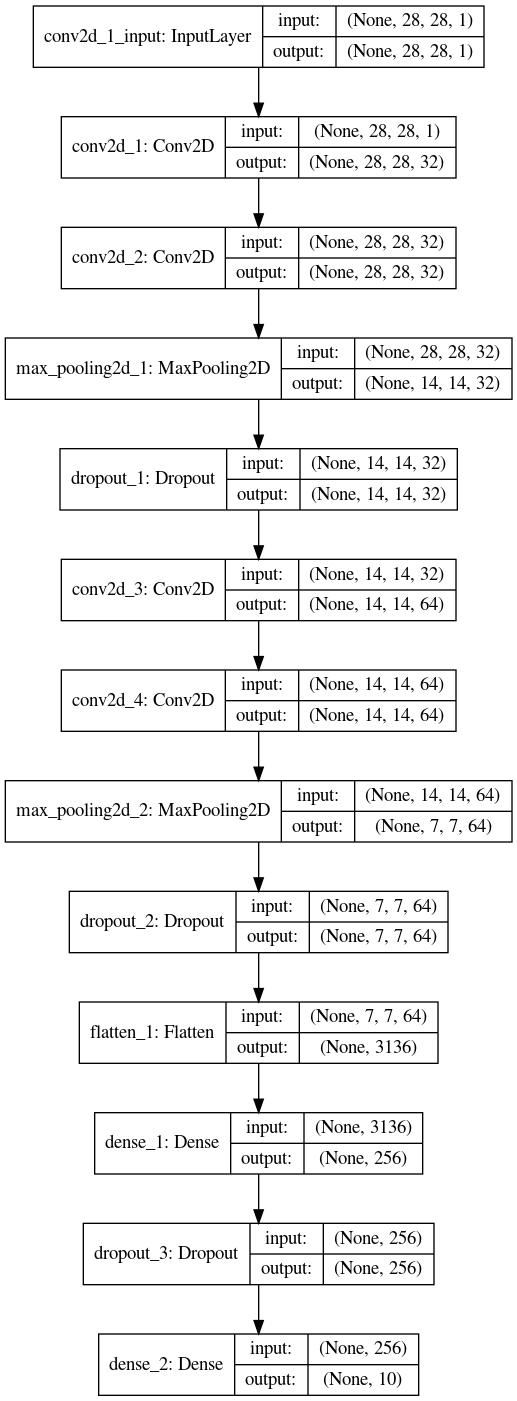

In [7]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.compile(Adam(lr = 0.0001),loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
keras.utils.plot_model(model, "Neural_Network.png", show_shapes=True)

## Training the Neural Network

In [8]:
model.fit_generator(datagen.flow(x_train,y_train,batch_size = 30),
                    steps_per_epoch = 1000,validation_data = (x_test,y_test),
                    epochs = 50, verbose = 2)

Epoch 1/50
 - 119s - loss: 1.5415 - accuracy: 0.5455 - val_loss: 0.1608 - val_accuracy: 0.9498
Epoch 2/50
 - 119s - loss: 0.3811 - accuracy: 0.8787 - val_loss: 0.0893 - val_accuracy: 0.9729
Epoch 3/50
 - 119s - loss: 0.2324 - accuracy: 0.9257 - val_loss: 0.0662 - val_accuracy: 0.9807
Epoch 4/50
 - 119s - loss: 0.1754 - accuracy: 0.9462 - val_loss: 0.0581 - val_accuracy: 0.9819
Epoch 5/50
 - 123s - loss: 0.1404 - accuracy: 0.9569 - val_loss: 0.0447 - val_accuracy: 0.9864
Epoch 6/50
 - 119s - loss: 0.1190 - accuracy: 0.9630 - val_loss: 0.0471 - val_accuracy: 0.9857
Epoch 7/50
 - 119s - loss: 0.1132 - accuracy: 0.9653 - val_loss: 0.0462 - val_accuracy: 0.9852
Epoch 8/50
 - 121s - loss: 0.0893 - accuracy: 0.9727 - val_loss: 0.0417 - val_accuracy: 0.9886
Epoch 9/50
 - 119s - loss: 0.0866 - accuracy: 0.9745 - val_loss: 0.0351 - val_accuracy: 0.9898
Epoch 10/50
 - 124s - loss: 0.0841 - accuracy: 0.9758 - val_loss: 0.0305 - val_accuracy: 0.9907
Epoch 11/50
 - 120s - loss: 0.0742 - accuracy: 0.

## Plotting the training vs testing accuracy

In [9]:
plot = pd.DataFrame()
plot['Validation Accuracy'] = model.history.history['val_accuracy']
plot['Training Accuracy'] = model.history.history['accuracy']
plot['Validation Loss'] = model.history.history['val_loss']
plot['Training Loss'] = model.history.history['loss']
plot['Epoch'] = plot.reset_index()['index']+1
plot

,Validation Accuracy,Training Accuracy,Validation Loss,Training Loss,Epoch
0,0.949762,0.545467,0.160818,1.541501,1
1,0.972857,0.878733,0.089294,0.381058,2
2,0.980714,0.925667,0.066248,0.232369,3
3,0.981905,0.946167,0.058101,0.175398,4
4,0.986429,0.956900,0.044672,0.140443,5
5,0.985714,0.962967,0.047114,0.119048,6
6,0.985238,0.965267,0.046246,0.113214,7
7,0.988571,0.972700,0.041655,0.089303,8
8,0.989762,0.974467,0.035080,0.086587,9
9,0.990714,0.975800,0.030530,0.084145,10


In [10]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = plot['Epoch'],
                         y = plot['Training Accuracy'].to_numpy()//.0001/100,
                         mode = 'lines+markers',name = 'Training Accuracy',
                         hovertemplate='The Training Accuracy is: %{y}%<br>'+
                                   'The Epochs run are: %{x}<extra></extra>'))
fig.add_trace(go.Scatter(x = plot['Epoch'],
                         y = plot['Validation Accuracy']//.0001/100,
                         mode = 'lines+markers',name = 'Validation Accuracy',
                         hovertemplate='The Validation Accuracy is: %{y}%'+
                               '<br>The Epochs run are: %{x}<extra></extra>'))
fig.update_layout(title  = 'Change in validation and training accuracy over the epochs',
                  xaxis_title = 'Epochs run',yaxis_range = [90,100],
                  yaxis_title = 'Acuuracy (In percentage)')
fig.show()

## Plotting the confusion matrix

In [11]:
predictions = model.predict_classes(x_test)
y_test = y_test
classes = [0,1,2,3,4,5,6,7,8,9]

confusion_mat = np.zeros((len(classes),len(classes)))
for i in range(len(predictions)):
    confusion_mat[classes.index(predictions[i])][classes.index(y_test[i])]+=1
confusion_mat = confusion_mat.T
confusion_mat_norm = confusion_mat/len(y_test)
confusion_mat_norm = (confusion_mat_norm//0.0001)/10000

fig = ff.create_annotated_heatmap(confusion_mat_norm, x=classes, y=classes, 
              annotation_text=confusion_mat_norm,
              colorscale='Viridis',text = confusion_mat,
              hovertemplate='Expected Value: %{y}<br>Predicted Value: %{x}'
                            +'<br>No. of datapoints in this category are:'
                            +' %{text}<extra></extra>')
fig.update_layout(title_text='<b>Confusion Matrix for the dataset:</b>',
                  xaxis = {'title':'Predicted Values'},width = 900,
                  yaxis = {'title':'Expected Values','autorange':'reversed'})
fig.update_traces(showscale = True)
fig.show()


We can see that the confusion matrix shows higher values for digits that look similar and might be confusiong to distinguish between and lower values for the digits that are easy to distinguish between.

# Predicting output over the testset.

## Reading test file

In [12]:
df_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
df_test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


## Processing of the test file

In [13]:
np_test = df_test.to_numpy().reshape(-1,28,28,1)

## Predicting over test set

In [14]:
df_test['label'] = model.predict_classes(np_test)

In [15]:
a = []
for i in range(28000):
    a.append(i+1)
df_test['ImageId'] = a
df_test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label,ImageId
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0,28000.000000,28000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0,4.455786,14000.500000
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0,2.895092,8083.048105
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.000000,7000.750000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4.000000,14000.500000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,7.000000,21000.250000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0,9.000000,28000.000000


## Exporting output to csv 

In [16]:
df_test[['ImageId','label']].to_csv('submission.csv',index=False)